In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import

In [2]:
path = "student-por.csv"
data = pd.read_csv(path)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
data.shape

(649, 33)

In [4]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [6]:
data.eq(0).sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            6
Fedu            7
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures      549
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      244
G1              1
G2              7
G3             15
dtype: int64

In [7]:
zero_count = ["Medu","Fedu","failures","absences","G1","G2","G3"]
for count in zero_count:
    printf = data[count].value_counts()
    print(printf)

Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64
Fedu
2    209
1    174
3    131
4    128
0      7
Name: count, dtype: int64
failures
0    549
1     70
2     16
3     14
Name: count, dtype: int64
absences
0     244
2     110
4      93
6      49
8      42
10     21
1      12
12     12
5      12
16     10
14      8
9       7
3       7
11      5
18      3
7       3
21      2
15      2
22      2
30      1
26      1
24      1
13      1
32      1
Name: count, dtype: int64
G1
10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: count, dtype: int64
G2
11    103
12     86
10     83
13     80
9      72
14     54
8      40
15     38
16     25
17     20
7      16
18     14
6       7
0       7
5       3
19      1
Name: count, dtype: int64
G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      1

In [8]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
dat = data.copy()

In [10]:
dat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [11]:
# Assuming you have a DataFrame 'dat' with a column 'age'

# Define a custom function to categorize ages
def categorize_age(age):
    if 15 <= age <= 25:
        return "young"
    else:
        return age

# Apply the custom function to the 'age' column to create an 'age_category' column
dat['age_category'] = dat['age'].apply(categorize_age)


In [12]:
dat.drop(columns = "age", inplace =True)

In [13]:
dat.select_dtypes('int64','float64').skew().to_frame()

,0
Medu,-0.029950
Fedu,0.215343
traveltime,1.247648
studytime,0.699619
failures,3.092699
famrel,-1.105934
freetime,-0.181277
goout,-0.008580
Dalc,2.141913
Walc,0.635904


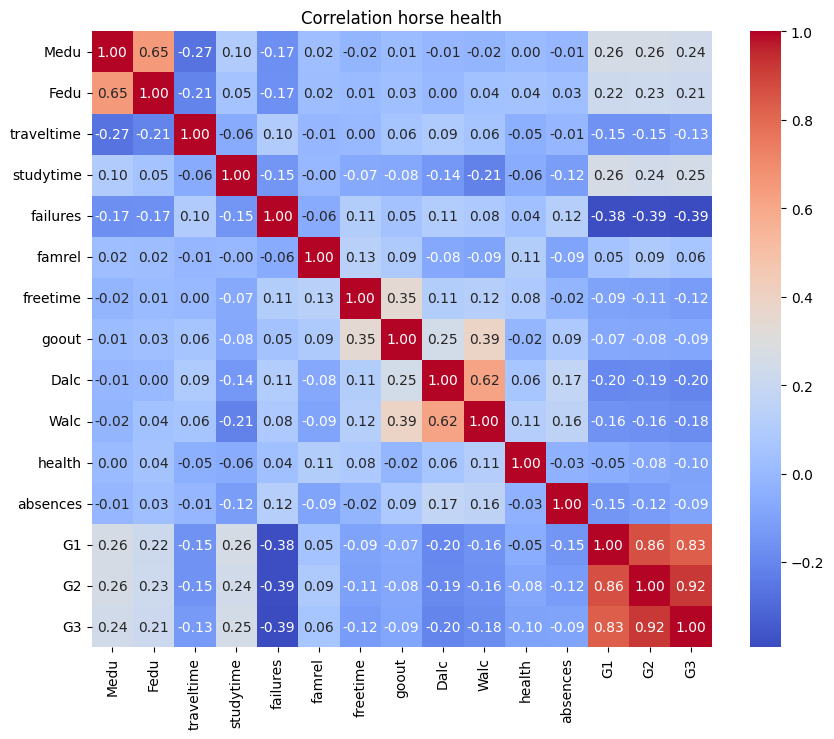

In [14]:
# Calculate the correlation matrix
correlation_matrix = dat.select_dtypes(include = ["int64","float64"]).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation horse health")
plt.show()

In [15]:
# dat["traveltime"] = np.log(dat["traveltime"])
# dat["studytime"] = np.log(dat["studytime"])
# dat["failures"] = np.log(dat["failures"])
# dat["famrel"] = np.log(dat["famrel"])
# dat["Dalc"] = np.log(dat["Dalc"])
# dat["absences"] = np.log(dat["absences"])
# dat["G3"] = np.log(dat["G3"])

In [16]:
# dat.select_dtypes('int64','float64').skew().to_frame()

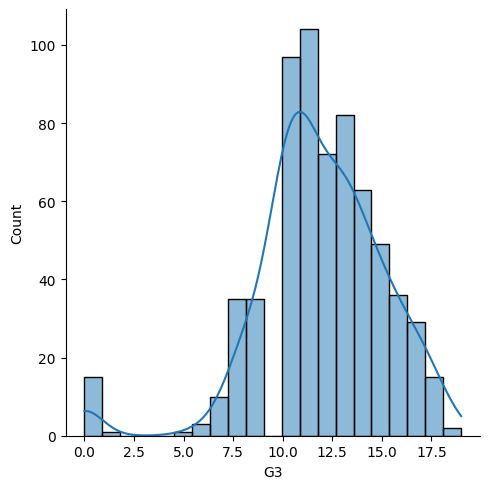

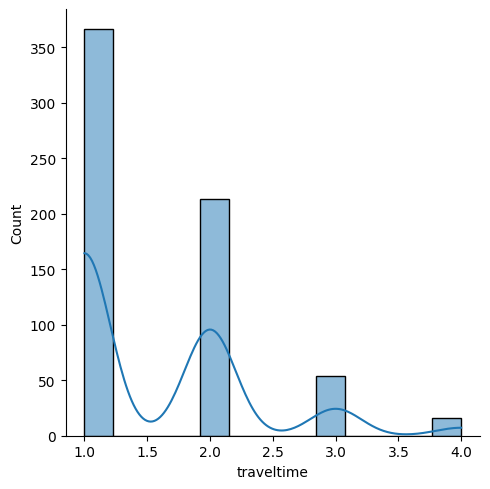

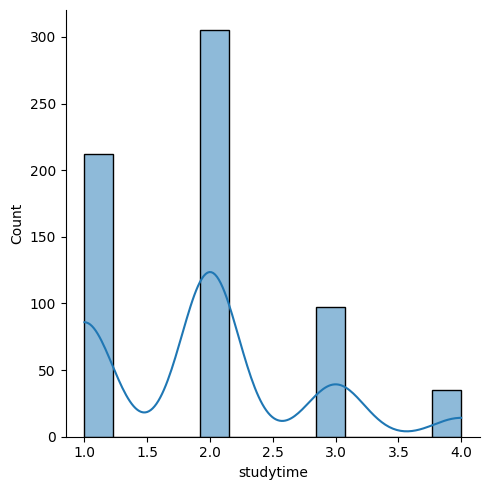

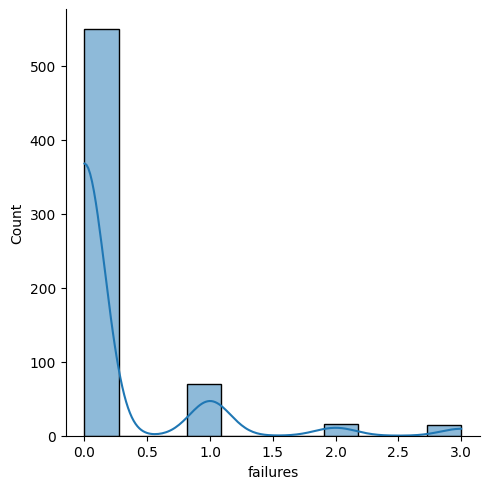

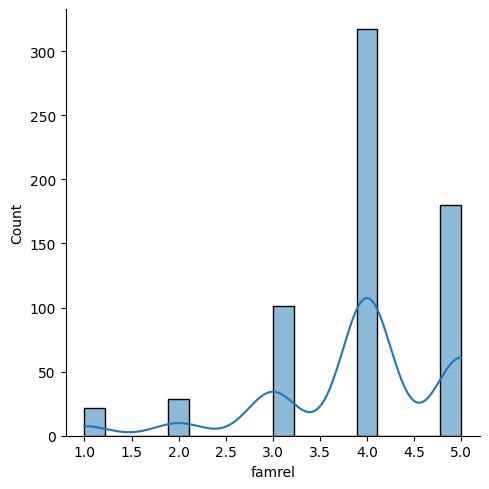

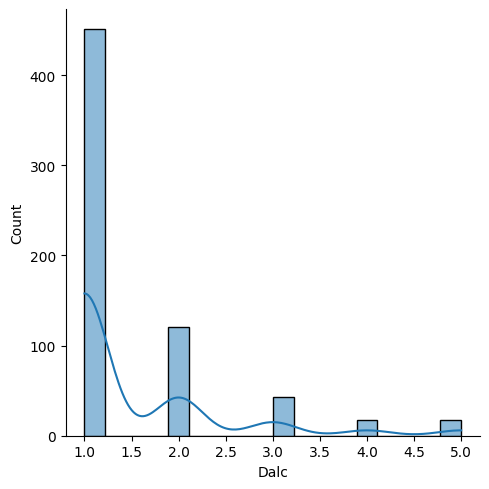

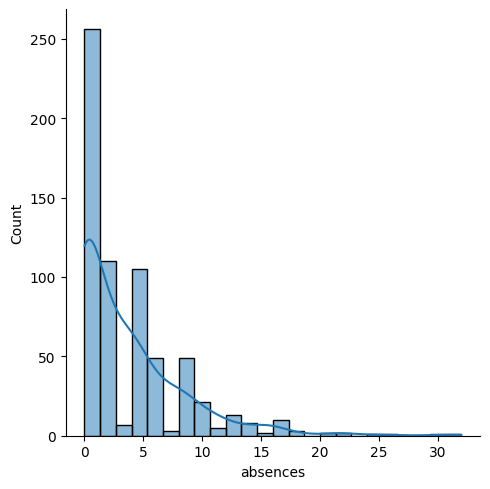

In [17]:
sns.displot(data=dat, x="G3", kde=True)
sns.displot(data=dat, x="traveltime", kde=True)
sns.displot(data=dat, x="studytime", kde=True)
sns.displot(data=dat, x="failures", kde=True)
sns.displot(data=dat, x="famrel", kde=True)
sns.displot(data=dat, x="Dalc", kde=True)
sns.displot(data=dat, x="absences", kde=True)

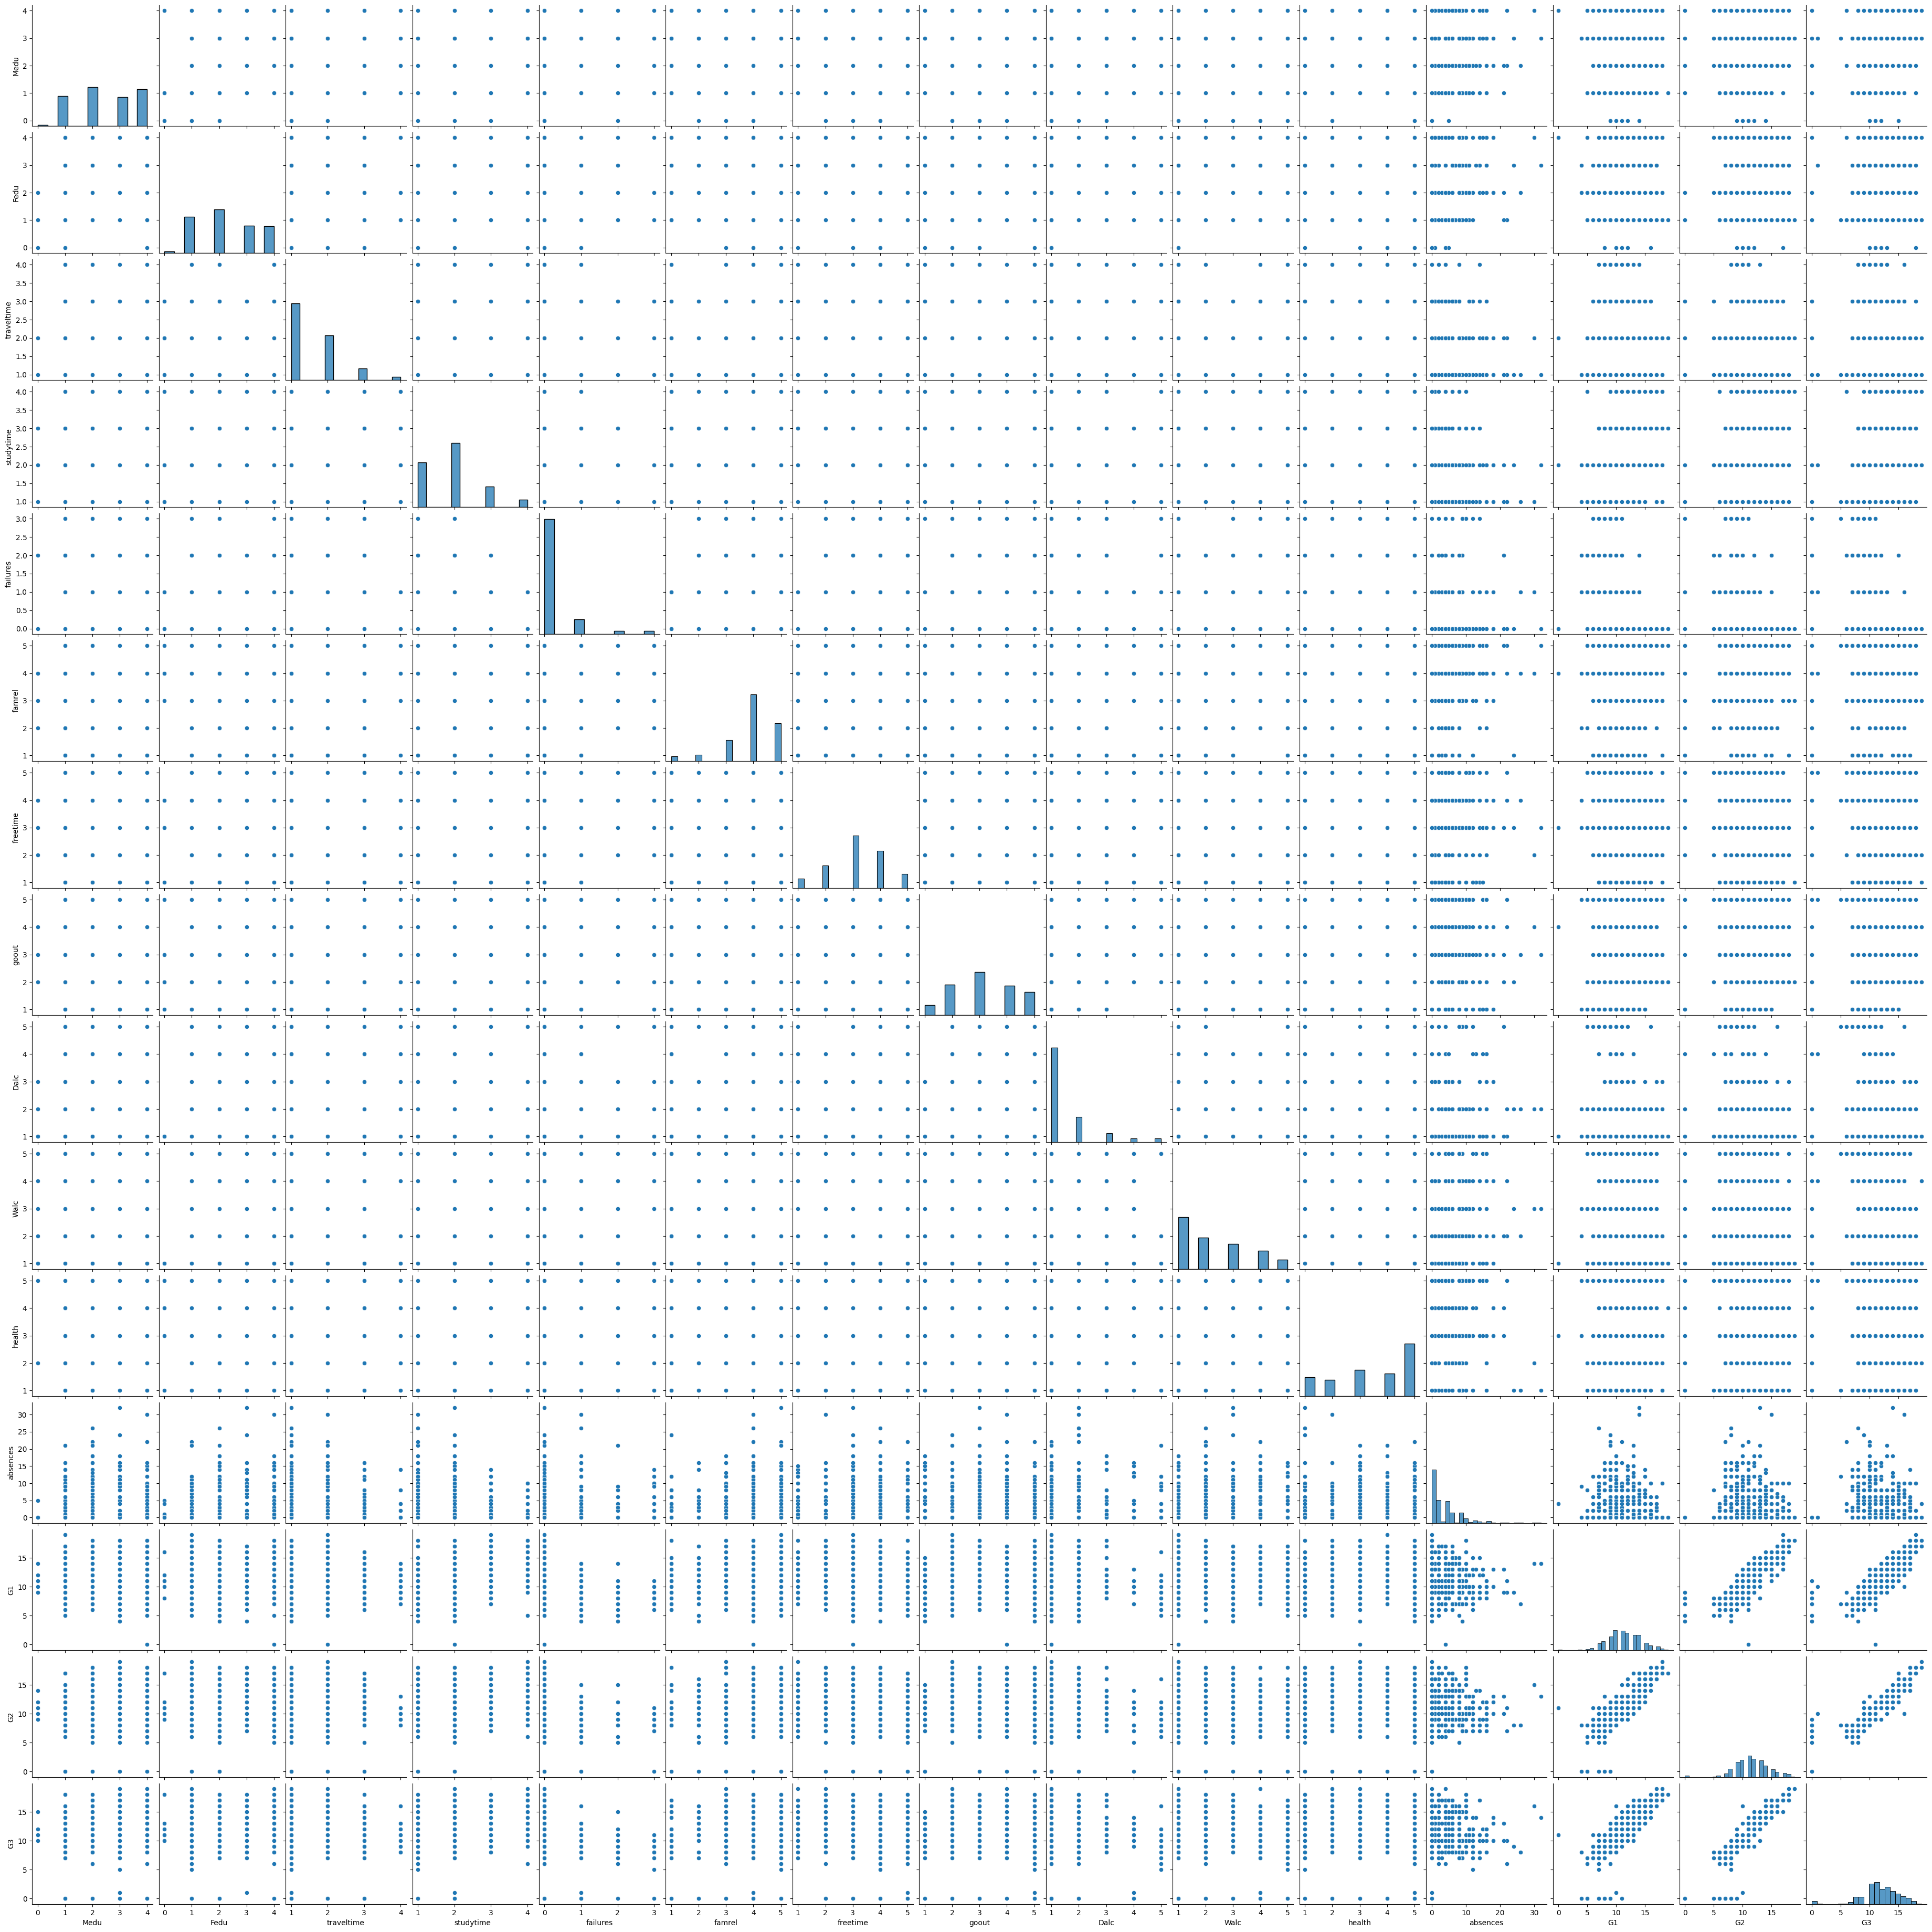

In [18]:
sns.pairplot(dat)

In [ ]:
# feature encoding
